In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

QUE ES CADA COLUMNA, formato, y si esta presente en otro DF (con mismo o distinto nombre)

AUCTIONS
auction_type_id: todo NaN, DESCARTADA
country: todos mismo pais, DESCARTADA
date: fecha
device_id: ID del dispositivo. es equivalente a ref_hash de clicks e installs
platform: plataforma. tiene 2 valores posibles asi que debe ser ios y android
ref_type_id: ¿?  tiene MISMOS 2 valores posibles que platform
source_id:  5 valores posibles, ni idea que es
    

    
CLICKS
advertiser_id: 7 valores posibles. hay un unico que es la mayoria de las veces
action_id: todo NaN, DESCARTADA
source_id: 11 valores posibles. ni idea
created: fecha creacion
country_code: todos mismo pais, DESCARTADA
latitude: latitud
longitude: longitud 
wifi_connection: todos false. DESCARTADA
carrier_id: ni idea que es carrier. tiene varios valores posibles
trans_id: supongo que id de transaccion? son todos unicos
os_minor: ni idea,  varios valores posibles
agent_device: ???
os_major: 10 valores posibles, ni idea
specs_brand: 5 valores posibles. 2 con muchisima cantidad y 3 con re pocas veces. marca de algo?
brand: marca de algo?
timeToClick: ¿tiempo que tarda en clickear desde que aparece? en segundos
touchX:  ¿posicion de la pantalla en el eje horizontal?
touchY:  ¿posicion de la pantalla en el eje vertical?
ref_type: 4 valores posibles. ni idea
ref_hash: id del dispositivo. equivalente a device id de auctions y ref hash de installs
    
    
EVENTS
date: date
event_id: id del evento
ref_type:  apple_ifa o google_advertising_id. supongo que el que tiene mas cantidad es google
ref_hash: no se que es pero muchos valores se repiten. algunos mas de 2000 veces. varios individuales tamb
application_id: id de app supongo? la explicacion en el drive es rara
attributed: cuantas subastas gano jampp. booleano
device_countrycode: todos repetidos. descartar
device_os_version: version del sistema operativo? hay muchos y muchos repetidos
device_brand: marca del dispositivo? medio raro porque hay muchas marcas que tienen solo 1 registro
device_model: modelo del celular, varios repetidos
device_city: ciudad, varios repetidos
session_user_agent: hash de la sesion?
trans_id: inutil. Todos NaN
user_agent: 
event_uuid:
carrier: suponemos que es empresa de telefonia pero no tieen mucho sentid oa cantidad de valores posibles
kind:
device_os: sistema operativo del dispositivo
wifi: si estan con wifi o no
connection_type: si esta por cable o por antena de 4g
ip_address: ip? se puede agrupar. raro que algunos se repitan mucho
device_language: 
    

    
INSTALLS
created: -
application_id:
ref_type:
ref_hash:
click_hash:
attributed: todo nan ,inutil
implicit:
device_countrycode:
device_brand: marca del dispositivo
device_model: modelo del dispositivo
session_user_agent: user agent. La mayoria son http-kit. En general no es util
user_agent:
event_uuid:
kind:
wifi: true or false si esta con wifi o no
trans_id: inutil. Todos NaN
ip_address: 
device_language: hay 184 idiomas ?

In [3]:
auctions = pd.read_csv('auctions.csv')

In [4]:
clicks = pd.read_csv('clicks.csv')

In [5]:
events = pd.read_csv('events.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
installs = pd.read_csv('installs.csv')

In [48]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [189]:
auctions.shape

(19571319, 7)

In [31]:
atributes_null = (auctions.notnull().sum().sort_values() / auctions.shape[0]) * 100

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


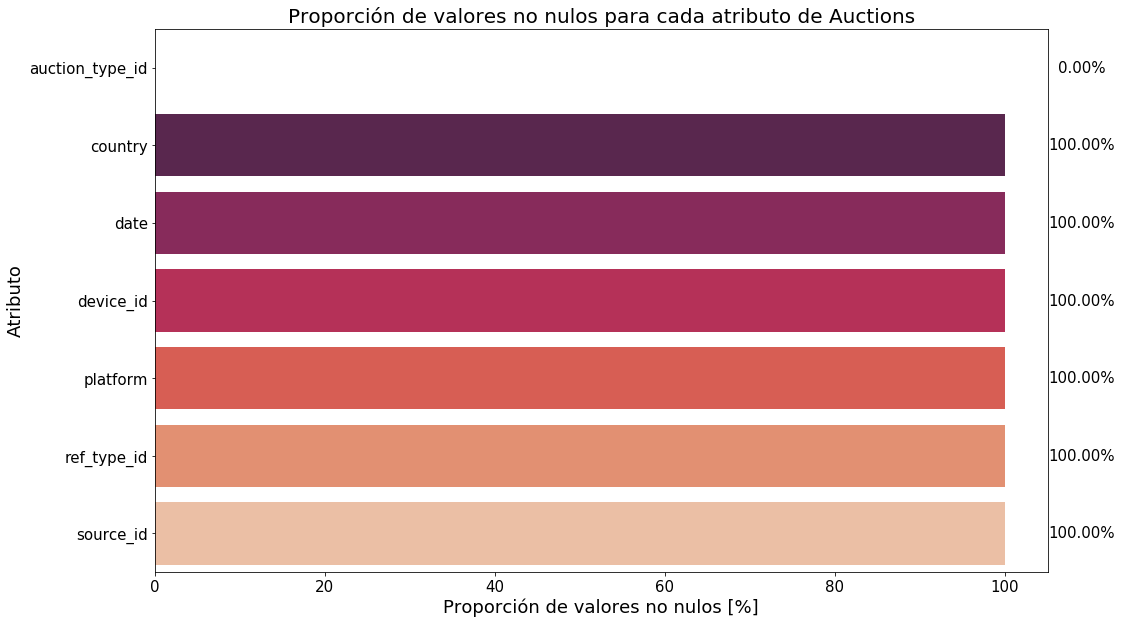

In [32]:
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette='rocket', orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores no nulos para cada atributo de Auctions", fontsize=20)
ax.set_xlabel('Proporción de valores no nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

Se ve que solo el atributo Action_type_id tiene todos los valores nulos

In [33]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [188]:
clicks.shape

(26351, 20)

In [42]:
atributes_null = (clicks.isna().sum().sort_values() / clicks.shape[0]) * 100

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


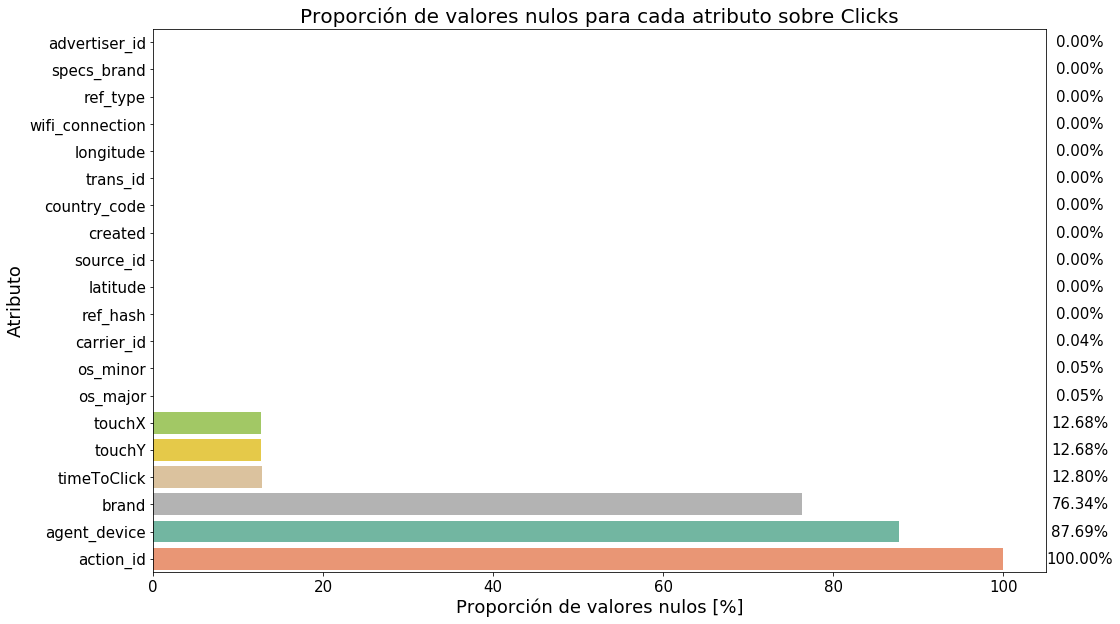

In [43]:
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette=sns.color_palette("Set2", 10), orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo sobre Clicks", fontsize=20)
ax.set_xlabel('Proporción de valores nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

Se puede observar que action_id tiene todos sus valores Nulos.

In [36]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [190]:
events.shape

(2494423, 22)

In [44]:
atributes_null = (events.isna().sum().sort_values() / events.shape[0]) * 100

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


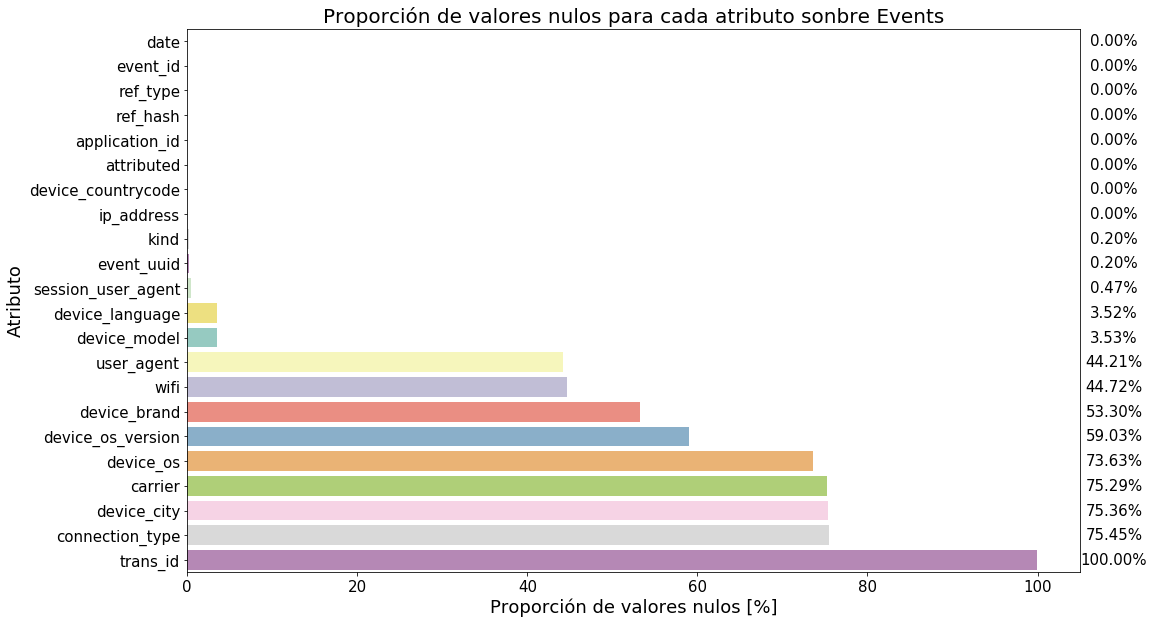

In [45]:
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette=sns.color_palette("Set3", 23), orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo sonbre Events", fontsize=20)
ax.set_xlabel('Proporción de valores nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

Se observa que trans_id tiene todos sus valores nulos

In [23]:
events["connection_type"].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [12]:
# Un solo pais
auctions["country"].unique()

array([6333597102633388268])

In [13]:
# INUTIL
clicks['wifi_connection'].unique()

array([False])

# Installs

In [6]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [7]:
installs.shape

(3412, 18)

In [8]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [14]:
installs["device_model"] = installs.device_model.astype(str)
installs["date_dt"] =  pd.to_datetime(installs.created, utc=True) 

In [15]:
atributes_null = (installs.isna().sum().sort_values() / installs.shape[0]) * 100

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


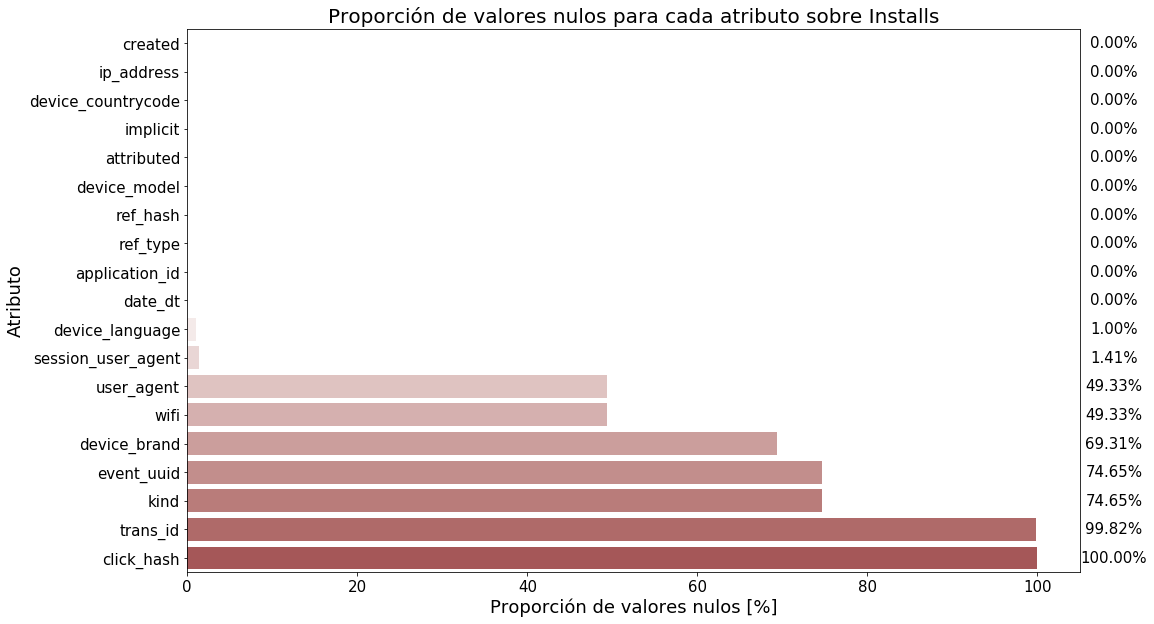

In [16]:
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette='vlag', orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo sobre Installs", fontsize=20)
ax.set_xlabel('Proporción de valores nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

In [18]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language', 'date_dt'],
      dtype='object')

In [17]:
# UTIL
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [20]:
installs.date_dt.min()

Timestamp('2019-03-05 00:00:38.219000+0000', tz='UTC')

In [21]:
installs.date_dt.max()

Timestamp('2019-03-13 23:54:00.526000+0000', tz='UTC')

In [110]:
installs_columns = list(installs.columns)
installs_columns.remove("created")
for i in installs_columns:
    print(i," ",installs[i].value_counts())
    
# Importante en 

application_id   7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64
ref_type   1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64
ref_hash   5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
5376622639905210608    3
470581161921490835     3
2807966731127456435    3
394181128078904930     3
1332624341050561368    3
8209340170282049305    3
1826618012885478111    3
6207088909238189318    3
4603142710878547974    3
4587898421740190562    3
3429460795301152906    3
1838099903940931904    3
808602801225309575     3
2756309363004630634    3
5716316704073038128    3
1951826604052927528    3
570710

In [111]:
#Marcas
installs.device_brand.value_counts()

3.083059e+17    472
2.208835e+18    185
2.523246e+18    116
5.951325e+18     72
2.987569e+18     40
3.812621e+18     37
5.137992e+17     34
6.538562e+18     26
3.228516e+18      9
1.083369e+18      9
4.371308e+18      7
3.093166e+18      5
2.262848e+18      5
4.994101e+18      4
3.849490e+18      4
8.285870e+18      3
3.742387e+18      3
5.645692e+18      3
8.230045e+17      3
6.111647e+18      3
9.169527e+18      1
5.588755e+18      1
3.172231e+18      1
5.189983e+18      1
3.624089e+18      1
7.855186e+18      1
2.748831e+18      1
Name: device_brand, dtype: int64

In [112]:
#Modelo
installs.device_model.value_counts()

2.33194661091e+18    759
6.88241452041e+18    276
2.61622806899e+18     76
7.78753075247e+18     65
2.92826232007e+18     63
9.14903648623e+18     56
1.18766099151e+17     55
1.26767685641e+18     53
5.99011668171e+18     46
2.13693496937e+18     41
7.11634310094e+18     40
2.06643138238e+17     40
2.98363754047e+18     38
1.75452785646e+18     38
9.09844315372e+18     36
8.65685448868e+18     36
2.43545009478e+18     31
8.16378269017e+18     30
5.58020496237e+18     30
4.44525231276e+18     28
1.99062722677e+18     27
4.34981552463e+18     25
6.87074292305e+18     23
7.62819698135e+18     22
5.96089584675e+18     22
1.76470144725e+18     21
3.40353240549e+17     21
6.85238889645e+18     20
8.60412220255e+18     19
2.94316402678e+18     19
                    ... 
6.20930607068e+18      1
4.05935871173e+18      1
4.15749056573e+18      1
2.02922760209e+18      1
2.5342028892e+18       1
6.13493512277e+18      1
4.51634650572e+18      1
6.73461751137e+18      1
6.0934943246e+18       1


In [113]:
installs.device_countrycode.value_counts()
#Hay dos codigos de pais

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

In [114]:
installs.ref_type.value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [115]:
installs.device_language.value_counts()

3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
1.526421e+18      56
4.060930e+18      48
2.822843e+17      39
6.035180e+18      24
1.193279e+18      21
6.535228e+18      10
1.101539e+17       9
3.177265e+18       5
3.695787e+17       5
3.095856e+18       4
6.569908e+18       2
5.846217e+18       2
7.774316e+18       2
4.594650e+18       2
6.782349e+18       1
5.061642e+18       1
1.686906e+18       1
5.794427e+17       1
2.488366e+18       1
3.544544e+18       1
3.074904e+18       1
2.061937e+18       1
4.073835e+18       1
6.846873e+18       1
7.045130e+18       1
Name: device_language, dtype: int64

In [1]:
dispositivos = installs.loc[:,["created","device_countrycode", "device_brand","device_model","device_language"],]
dispositivos["Cantidad"] = 1

NameError: name 'installs' is not defined

In [117]:
#Veo cuantos devide_model hay en cada pais
dispositivos.groupby(["device_countrycode","device_model"]).agg({'Cantidad': 'sum'})

Cantidad
device_countrycode  device_model               
2970470518450881158 1.04392557401e+18         1
                    1.05935763128e+18         2
                    1.06521119959e+17         1
                    1.11851491697e+18         8
                    1.18131826771e+18        10
                    1.18766099151e+17        48
                    1.26767685641e+18        47
                    1.29033175553e+18         2
                    1.31585155065e+18         1
                    1.3216811936e+18          8
                    1.3263659149e+18          1
                    1.32786406697e+18         1
                    1.35361885922e+18         1
                    1.38034842019e+18         1
                    1.43181816152e+18         9
                    1.44814088022e+18         1
                    1.50619000071e+18         3
                    1.54090713056e+18         9
                    1.5477631329e+18          2
                    1.57779610901e+18         4
                    1.63105377128e+18         1
                    1.65263985921e+18         3
                    1.69764726245e+18         1
                    1.72036964101e+18        11
                    1.75452785646e+18        16
                    1.76470144725e+18        19
                    1.80369676859e+18         1
                    1.81988097581e+17         2
                    1.87597292745e+18         6
                    1.92599132171e+18         4
...                                         ...
6333597102633388268 8.53519835683e+18         1
                    8.55777653441e+18         2
                    8.60412220255e+18        18
                    8.64506475104e+18         3
                    8.65685448868e+18         1
                    8.66856691825e+18         2
                    8.67616799104e+17         1
                    8.71627700668e+18         8
                    8.73376884636e+18         9
                    8.83054791728e+18         1
                    8.84552597627e+18         1
                    8.89141337809e+18         2
                    8.90823894428e+18         1
                    8.93098219401e+17         3
                    9.05355787893e+18         1
                    9.08182398411e+18         1
                    9.09605127492e+18         1
                    9.09844315372e+18        36
                    9.10946553001e+18        17
                    9.14903648623e+18         4
                    9.15881384976e+18         1
                    9.17762562077e+18         3
                    9.17974342537e+18         1
                    9.21761138248e+18         1
                    9.2217334104e+18          6
                    9.22245023622e+18         2
                    9.35279006475e+17         2
                    9.59433107261e+17         2
                    9.82208954572e+17         1
                    nan                       1

[500 rows x 1 columns]

# Dispositivos por country

## Dispositivos country = 2970470518450881158

In [118]:
dispositivos_country1 = dispositivos.loc[dispositivos.device_countrycode == 2970470518450881158]
dispositivos_country1.head()

,created,device_countrycode,device_brand,device_model,device_language,Cantidad
135,2019-03-10 00:31:15.940,2970470518450881158,NaN,5.61302164793e+18,3.301378e+18,1
136,2019-03-10 23:18:21.729,2970470518450881158,NaN,7.62819698135e+18,3.301378e+18,1
137,2019-03-11 22:41:12.621,2970470518450881158,NaN,7.78753075247e+18,4.077062e+17,1
138,2019-03-13 11:58:55.848,2970470518450881158,NaN,2.06643138238e+17,3.301378e+18,1
139,2019-03-13 00:47:01.874,2970470518450881158,NaN,2.81009878465e+17,3.301378e+18,1


### Device_brand 

In [119]:
dispos = dispositivos_country1.fillna(value="VACIO")

In [120]:
coutry1_device_brand = dispos.groupby("device_brand").agg({'Cantidad': 'sum'}).reset_index()
coutry1_device_brand.sort_values(ascending=False,by="Cantidad").head(10)

,device_brand,Cantidad
0,VACIO,1592


In [121]:
#Todos los datos de device_brand dentro de este pais estan vacios

### Device_model

In [122]:
country1_device_model = dispositivos_country1.groupby("device_model").agg({'Cantidad': 'count'}).reset_index()
country1_device_model.sort_values(ascending=False,by="Cantidad").head(10)

,device_model,Cantidad
166,6.88241452041e+18,273
53,2.61622806899e+18,70
60,2.92826232007e+18,57
230,9.14903648623e+18,52
5,1.18766099151e+17,48
6,1.26767685641e+18,47
40,2.13693496937e+18,38
221,8.65685448868e+18,35
141,5.99011668171e+18,32
64,2.98363754047e+18,31


In [123]:
#Cantidad de modelos
country1_device_model.device_model.count()

234

### Device Lenguage

In [124]:
country1_device_lenguage = dispositivos_country1.groupby("device_language").agg({'Cantidad': 'sum'}).reset_index()
country1_device_lenguage.sort_values(ascending=False,by="Cantidad").head(10)

,device_language,Cantidad
2,3.301378e+18,1475
0,4.077062e+17,69
3,4.060930e+18,47
1,5.794427e+17,1


In [125]:
#Cantidad de idiomas
country1_device_lenguage.device_language.count()

4

## Dispositivos country = 6333597102633388268

In [126]:
dispositivos_country2 = dispositivos.loc[dispositivos.device_countrycode == 6333597102633388268]
dispositivos_country2.head()

,created,device_countrycode,device_brand,device_model,device_language,Cantidad
0,2019-03-13 01:43:33.445,6333597102633388268,3.083059e+17,4.44525231276e+18,NaN,1
1,2019-03-13 04:58:35.078,6333597102633388268,3.083059e+17,4.44525231276e+18,NaN,1
2,2019-03-13 04:20:57.666,6333597102633388268,5.137992e+17,6.02654332793e+18,3.301378e+18,1
3,2019-03-13 04:20:57.698,6333597102633388268,5.137992e+17,6.02654332793e+18,NaN,1
4,2019-03-10 22:24:56.684,6333597102633388268,1.083369e+18,7.8766118399e+18,3.301378e+18,1


### Device Brand

In [127]:
country2_device_brand = dispositivos_country2.groupby("device_brand").agg({'Cantidad': 'sum'}).reset_index()
country2_device_brand.sort_values(ascending=False,by="Cantidad").head(10)

,device_brand,Cantidad
0,3.083059e+17,472
4,2.208835e+18,185
6,2.523246e+18,116
21,5.951325e+18,72
8,2.987569e+18,40
14,3.812621e+18,37
1,5.137992e+17,34
23,6.538562e+18,26
11,3.228516e+18,9
3,1.083369e+18,9


In [128]:
#Hay 27 marcas
country2_device_brand.device_brand.count()

27

### Device Model

In [129]:
country2_device_model = dispositivos_country2.groupby("device_model").agg({'Cantidad': 'sum'}).reset_index()
country2_device_model.sort_values(ascending=False,by="Cantidad").head(10)

,device_model,Cantidad
41,2.33194661091e+18,759
216,7.78753075247e+18,37
194,7.11634310094e+18,36
253,9.09844315372e+18,36
29,2.06643138238e+17,31
18,1.75452785646e+18,22
180,6.6420350268e+18,19
238,8.60412220255e+18,18
120,4.80146669353e+18,17
109,4.43057868656e+18,17


In [131]:
#Cantidad de modelos
country2_device_model.device_model.count()

266

### Device_language

In [132]:
country2_device_language = dispositivos_country2.groupby("device_language").agg({'Cantidad': 'sum'}).reset_index()
country2_device_language.sort_values(ascending=False,by="Cantidad").head(10)

,device_language,Cantidad
28,9.028383e+18,714
17,4.621024e+18,632
25,6.977049e+18,238
5,1.526421e+18,56
1,2.822843e+17,39
20,6.035180e+18,24
4,1.193279e+18,21
21,6.535228e+18,10
12,3.301378e+18,9
0,1.101539e+17,9


In [133]:
#Cantidad de lenguajes
country2_device_language.device_language.count()

29

# Comparacion entre los dos paises

In [142]:
join_countrys = country2_device_model.merge(country1_device_model , how="left",on="device_model").fillna(0)
join_countrys.columns = ["device_model","6333597102633388268", "2970470518450881158"]

### El top 10 de los modelos en el pais 2970470518450881158

In [143]:
top_10 =  join_countrys.sort_values(ascending=False,by="2970470518450881158").head(10)
top_10

,device_model,6333597102633388268,2970470518450881158
186,6.88241452041e+18,3,273.0
52,2.61622806899e+18,6,70.0
61,2.92826232007e+18,6,57.0
255,9.14903648623e+18,4,52.0
3,1.18766099151e+17,7,48.0
4,1.26767685641e+18,6,47.0
34,2.13693496937e+18,3,38.0
240,8.65685448868e+18,1,35.0
162,5.99011668171e+18,14,32.0
65,2.98363754047e+18,7,31.0


In [146]:
#top_10["device_model"] = top_10.device_model.astype(str)
top_10 = join_countrys.sort_values(ascending=False,by="2970470518450881158").head(11)
top_10 = top_10.loc[top_10.device_model != "6.88241452041e+18"]
#SE SACÓ el que tiene mas diferencias porque el grafico si no no iba a mostrar las diferencias entre los demas dispositivos.... 
#No se iba a entender del todo
top_10

,device_model,6333597102633388268,2970470518450881158
52,2.61622806899e+18,6,70.0
61,2.92826232007e+18,6,57.0
255,9.14903648623e+18,4,52.0
3,1.18766099151e+17,7,48.0
4,1.26767685641e+18,6,47.0
34,2.13693496937e+18,3,38.0
240,8.65685448868e+18,1,35.0
162,5.99011668171e+18,14,32.0
65,2.98363754047e+18,7,31.0
216,7.78753075247e+18,37,28.0


/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


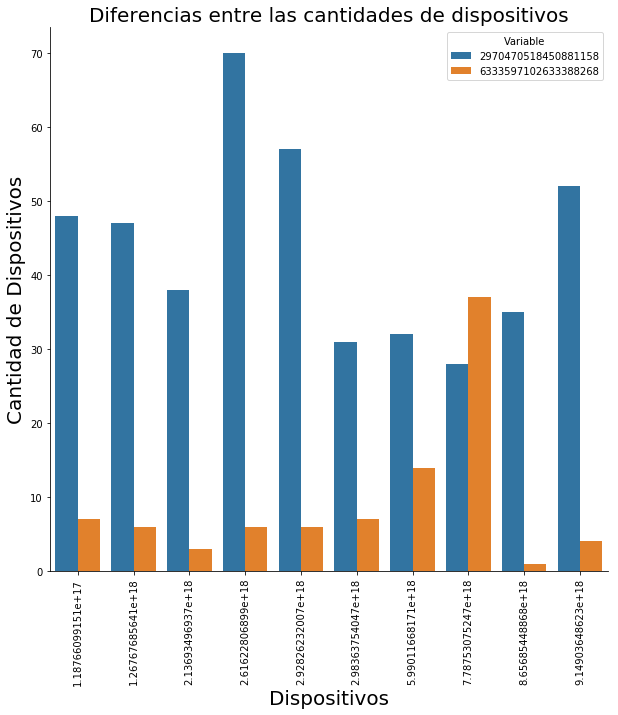

In [145]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    top_10.set_index('device_model')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='device_model', y='Value', hue='Variable', data=tidy, ax=ax1, orient="v")
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Diferencias entre las cantidades de dispositivos", fontsize=20)
g.set_xlabel("Dispositivos", fontsize=20)
g.set_ylabel("Cantidad de Dispositivos", fontsize=20)

sns.despine(fig)

### El top 10 de los modelos en el pais 6333597102633388268

In [148]:
top_10 = join_countrys.sort_values(ascending=False,by="6333597102633388268").head(10)
top_10

,device_model,6333597102633388268,2970470518450881158
41,2.33194661091e+18,759,0.0
216,7.78753075247e+18,37,28.0
194,7.11634310094e+18,36,4.0
253,9.09844315372e+18,36,0.0
29,2.06643138238e+17,31,9.0
18,1.75452785646e+18,22,16.0
180,6.6420350268e+18,19,0.0
238,8.60412220255e+18,18,1.0
120,4.80146669353e+18,17,2.0
109,4.43057868656e+18,17,1.0


No hay consistencia entre los dos paises en cuanto a los installs de los dispositivos con mayores cantidades.

Para el device "2.331947e+18" hay 759 installs en el pais 6333597102633388268 pero para el otro pais hay cantidad igual a 0. Se ve que algunos dispositivos no existen en el otro pais.

In [149]:
#top_10.device_model = top_10.device_model.astype(str)
top_10 = join_countrys.sort_values(ascending=False,by="6333597102633388268").head(11)
top_10 = top_10.loc[top_10.device_model != "2.33194661091e+18"]


#SE SACÓ el que tiene mas diferencias porque el grafico si no iba a mostrar las diferencias entre los demas dispositivos.... 
#No se iba a entender del todo

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


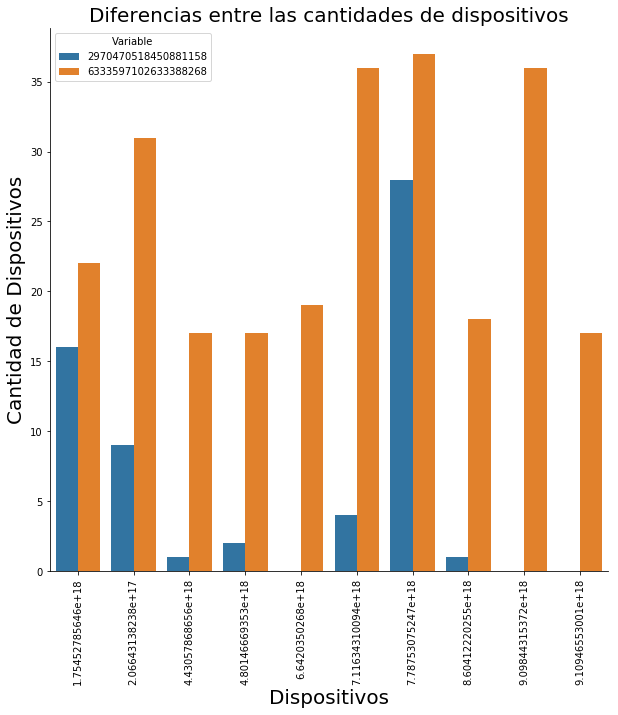

In [150]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    top_10.set_index('device_model')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='device_model', y='Value', hue='Variable', data=tidy, ax=ax1, orient="v")
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Diferencias entre las cantidades de dispositivos", fontsize=20)
g.set_xlabel("Dispositivos", fontsize=20)
g.set_ylabel("Cantidad de Dispositivos", fontsize=20)

sns.despine(fig)

Se puede observar que no hay consistencia entre los dos paises en cuanto a la cantidad de installs en los modelos de los dispositivos

In [151]:
#solo 7 de los clicks coinciden en ref hash con installs. el resto de los installs no fueron nuestros

In [152]:
installs["ref_hash"].isin(clicks["ref_hash"]).value_counts()

False    3405
True        7
Name: ref_hash, dtype: int64

In [153]:
#miro las plataformas . varios tienen informacion del modelo de celular, version de android, etc

In [154]:
installs["user_agent"].value_counts().to_frame().iloc[50:100]

,user_agent
Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J610G Build/M1AJQ),6
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-J600G Build/R16NW),6
Dalvik/2.1.0 (Linux; U; Android 7.1.2; LM-X210 Build/N2G47H),6
Dalvik/2.1.0 (Linux; U; Android 7.0; Moto G (4) Build/NPJS25.93-14-18),6
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G935F Build/R16NW),6
Dalvik/2.1.0 (Linux; U; Android 9; motorola one Build/PPKS29.68-16-21-3),5
MercadoPago/2.58.0.2 CFNetwork/894 Darwin/17.4.0,5
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-A750G Build/R16NW),5
MercadoPago/2.56.0.0 CFNetwork/976 Darwin/18.2.0,5
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G950F Build/R16NW),5


In [155]:
#android = android
#darwin = MAC OS

#creo columnas sobre sistema operativo 

In [156]:
import numpy as np

In [157]:
def is_android_or_macos(row):
    if row["user_agent"] is np.nan:
        return None
    agent = row["user_agent"].lower()
    if "android" in agent:
        return "android"
    elif "darwin" in agent:
        return "mac os"
    else:
        return "other"

In [158]:
installs["os"] = installs.apply(is_android_or_macos, axis=1)

In [159]:
installs["os"].value_counts()

android    957
mac os     772
Name: os, dtype: int64

In [160]:
#la mayoria de las instalaciones son con wifi

In [161]:
installs["wifi"].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [162]:
#agrego la marca del celular en caso de installs con android

In [163]:
android = installs[installs["os"] == "android"]

In [164]:
android.head()["user_agent"]

9     Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M B...
10    Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570...
11    Dalvik/2.1.0 (Linux; U; Android 6.0; MotoG3-TE...
12    Dalvik/2.1.0 (Linux; U; Android 8.1.0; Redmi 6...
13    Dalvik/2.1.0 (Linux; U; Android 5.1.1; SM-G531...
Name: user_agent, dtype: object

In [165]:
def brand_of_android_device(row):
    if row["user_agent"] is np.nan:
        return None
    agent = row["user_agent"].lower()
    if "sm-" in agent or "gt-" in agent:
        return "samsung"
    elif "lg-" in agent or "lm-" in agent:
        return "lg"
    elif "moto" in agent or "xt" in agent:
        return "motorola"
    elif "miui" in agent or " mi " in agent:
        return "xiaomi"
    elif "asus" in agent:
        return "asus"
    elif "lenovo" in agent:
        return "lenovo"
    elif  "huawei" in agent:
        return "huawei"
    elif "oneplus" in agent:
        return "oneplus"
    elif "positivo" in agent or "S455" in agent:
        return "positivo bgh"
    elif "zte" in agent:
        return "zte"
    elif "nokia" in agent:
        return "nokia"
    else:
        return "other"

In [166]:
android["brand"] = android.apply(brand_of_android_device, axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
android["brand"].value_counts()

samsung         469
motorola        186
lg              115
xiaomi           68
other            41
huawei           36
asus             26
lenovo            7
zte               4
positivo bgh      3
oneplus           1
nokia             1
Name: brand, dtype: int64

In [168]:
#que carajo son los mac os? 

In [169]:
installs[installs["os"] == "mac os"]["user_agent"].apply(lambda x: x.split("/")[0]).value_counts()

MercadoPago    731
NextGen         20
HotelUrbano     13
PeixeUrbano      7
takealot         1
Name: user_agent, dtype: int64

In [170]:
#todos son http-kit/2.0

In [171]:
installs[installs["os"] == "mac os"][["user_agent", "session_user_agent"]].head()

,user_agent,session_user_agent
330,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
331,MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
332,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
333,MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
334,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0


In [172]:
#cosas latitud y longitud
#los datos no dicen un carajo
#no llega a nada, al ejecutar el geolocator 

In [173]:
lat = clicks.iloc[1]["latitude"]
lon = clicks.iloc[1]["longitude"]

In [180]:
from geopy.geocoders import Nominatim

In [181]:
"""geolocator = Nominatim()
geolocator.reverse('52.5094982,13.3765983')"""

"geolocator = Nominatim()\ngeolocator.reverse('52.5094982,13.3765983')"

In [182]:
"""latlon = str(lon)+", "+str(lat)
geolocator.reverse(latlon)"""

'latlon = str(lon)+", "+str(lat)\ngeolocator.reverse(latlon)'

In [183]:
# Clicks by latitude and longitude
clicks[["latitude", "longitude"]].groupby(["latitude", "longitude"]).size().reset_index().head()


,latitude,longitude,0
0,1.205058,1.077332,171
1,1.205325,1.070340,10
2,1.205356,1.070100,2
3,1.205393,1.070163,2
4,1.205393,1.070448,9


In [184]:
# Hay solo 82 latitudes y longitudes que hacen clicks.
len(clicks[["latitude", "longitude"]].groupby(["latitude", "longitude"]).size().reset_index())

82

In [185]:
# 26351
len(clicks)

26351

In [48]:
# Clicks

In [49]:
clicks['range'] = pd.to_datetime(clicks['created']).dt.floor('60T').dt.time

In [50]:
clicksIn60Min = clicks.groupby(["range"])["range"].count()

In [51]:
clicksIn60Min

range
00:00:00     440
01:00:00    4209
02:00:00    2327
03:00:00     754
04:00:00    1079
05:00:00     945
06:00:00     678
07:00:00     518
08:00:00     537
09:00:00     754
10:00:00    1143
11:00:00    1455
12:00:00    1199
13:00:00     926
14:00:00     834
15:00:00     959
16:00:00     966
17:00:00     641
18:00:00     655
19:00:00     380
20:00:00     389
21:00:00     451
22:00:00    1386
23:00:00    2726
Name: range, dtype: int64

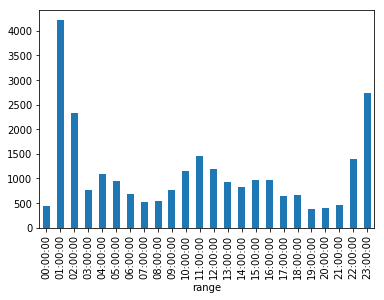

In [52]:
clicksIn60Min.plot.bar()

In [53]:
#muchos eventos corresponden a un mismo click

In [54]:
events["ref_hash"].isin(clicks["ref_hash"]).value_counts()

False    2479078
True       15345
Name: ref_hash, dtype: int64

In [55]:
clicks["ref_hash"].isin(events["ref_hash"]).value_counts()

False    24571
True      1780
Name: ref_hash, dtype: int64

In [56]:
#me fijo si para algun ref_hash de evento hay mas de un click

In [57]:
#en este caso es asi
clicks[clicks["ref_hash"]==71063745129569882]

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,range
18848,3,NaN,0,2019-03-13T20:04:03.605Z,6333597102633388268,1.205689,1.070234,False,3.0,-10Ch0QIP5PydFNZPKmW9DTxP74WqHg,...,NaN,3.072849e+18,392184377613098015,2.0,67.893,0.134,0.708,1891515180541284343,71063745129569882,20:00:00
19198,3,NaN,0,2019-03-13T20:40:24.650Z,6333597102633388268,1.205689,1.070234,False,3.0,SF16Uq3tuApnZzQoM1deRCSOEujNpbw,...,NaN,3.072849e+18,392184377613098015,2.0,236.203,0.910,0.669,1891515180541284343,71063745129569882,20:00:00


In [58]:
#para esos 2 clicks, hay 13 eventos. pueden ser dos sesiones distintas
events[events["ref_hash"] == 71063745129569882].shape

(13, 22)

In [59]:
#junto por ref hash, me quedo solo con los hashes que aparecen en ambos dataset

In [60]:
events_clicks = events.merge(clicks,on="ref_hash", how="inner")

In [61]:
#agrupo por ref hash , cuento y agarro alguna columna cualquiera para ver cuantos eventos tengo por un ref hash 
#que tambien aparece al menos una vez en clicks

In [62]:
counted_events_by_click = events_clicks.groupby("ref_hash").count()["attributed"]

In [63]:
counted_events_by_click.sort_values(ascending=False).head()

ref_hash
5639173013143339138    2679
8569678576097759996    1035
7517244403087954706     837
3418665291876597359     431
5029802868737317380     411
Name: attributed, dtype: int64

In [64]:
#algunos hashes tienen muchos eventos. miro si los primeros tieenen muchos clicks

In [65]:
#el ref hash que aparece en ambos con mas eventos tiene solo 3 clicks
len(clicks[clicks["ref_hash"] == 5639173013143339138])

3

In [66]:
#miro cuantos installs tiene
#nada
len(installs[installs["ref_hash"] == 5639173013143339138])

0

In [67]:
#el segundo ref hash que aparece en ambos con mas eventos tambien tiene 3
len(clicks[clicks["ref_hash"] == 8569678576097759996])

3

In [68]:
#tampoco tiene installs
len(installs[installs["ref_hash"] == 8569678576097759996])

0

In [69]:
#conclusion? son bots que nunca llegan a instalar?

In [70]:
#comparamos si en algun moemnto estan cerca la fecha del click con la de alguno de los eventos para ese hash
#es posible que ningun evento corresponda a un click? que no sea considerado evento?

In [71]:
#miramos por ejemplo un hash que tiene 1 click y 4 eventos
#no coinciden. los eventos tienen todos al menos 2 dias de diferencia con el click
events_clicks[events_clicks["ref_hash"] == 6251876360487092][["created","date"]]

,created,date
23209,2019-03-10T05:40:17.612Z,2019-03-05 20:48:48.418
23210,2019-03-10T05:40:17.612Z,2019-03-12 19:05:10.520
23211,2019-03-10T05:40:17.612Z,2019-03-12 18:00:52.581
23212,2019-03-10T05:40:17.612Z,2019-03-12 17:59:50.975


In [72]:
#hay muchos casos con 1 solo evento y 1 solo click. miro si en algunos de  ellos coinciden las fechas
counted_events_by_click.head(10)

ref_hash
4467013148049275      1
6251876360487092      4
16228483706113027     1
37004804375929554     2
38415420842513232     3
56820982416916093    12
71063745129569882    26
74885721366447582     1
75699248537913178     1
80994729690281632     4
Name: attributed, dtype: int64

In [73]:
#no coincide
events_clicks[events_clicks["ref_hash"] == 4467013148049275][["created","date"]]

,created,date
14482,2019-03-11T01:40:34.533Z,2019-03-07 03:54:58.383


In [74]:
#tiene 3 hs de diferencia. si click estuviera en UTC y date en gmt -3 en ese caso tendrian solo 9 minuts de diferencia
events_clicks[events_clicks["ref_hash"] == 74885721366447582][["created","date"]]

,created,date
23171,2019-03-09T01:30:15.111Z,2019-03-09 22:21:11.710


In [75]:
#no coincide
events_clicks[events_clicks["ref_hash"] == 16228483706113027][["created","date"]]

,created,date
8579,2019-03-10T08:22:17.478Z,2019-03-12 23:45:02.012


In [76]:
comparing = events_clicks[["ref_hash","date","created"]]

In [77]:
comparing.head()

,ref_hash,date,created
0,8187571300120427764,2019-03-08 22:13:08.838,2019-03-09T01:05:04.020Z
1,8187571300120427764,2019-03-09 19:13:00.431,2019-03-09T01:05:04.020Z
2,8187571300120427764,2019-03-09 19:12:58.551,2019-03-09T01:05:04.020Z
3,8187571300120427764,2019-03-09 19:13:01.768,2019-03-09T01:05:04.020Z
4,8187571300120427764,2019-03-09 19:12:56.266,2019-03-09T01:05:04.020Z


In [78]:
#mirando el caso de 8187571300120427764
#para un mismo click hay distintos eventos
#lo que no encuentro sentido es que los eventos son todos anteriores al click.
#incluso asumiendo que created esta en utc y lo convertimos a gmt -3, casi todos los eventos igual serian
#anteriores excepto por el dei ndice 0. el cua seria 5 minutos despues
#hago columna con la diferencia en tiempo entre evento y click
events_clicks['date_dt'] = pd.to_datetime(events_clicks.date, utc=True)
events_clicks['created_dt'] = pd.to_datetime(events_clicks.created, utc=True)
events_clicks['event_click_delta'] = (events_clicks.date_dt - events_clicks.created_dt)

In [79]:
#miro algunos ejemplos

In [80]:

events_clicks[events_clicks.ref_hash ==6251876360487092][['event_id', 'date', 'created', 'event_click_delta']].sort_values('event_click_delta')

,event_id,date,created,event_click_delta
23209,22,2019-03-05 20:48:48.418,2019-03-10T05:40:17.612Z,-5 days +15:08:30.806000
23212,22,2019-03-12 17:59:50.975,2019-03-10T05:40:17.612Z,2 days 12:19:33.363000
23211,22,2019-03-12 18:00:52.581,2019-03-10T05:40:17.612Z,2 days 12:20:34.969000
23210,22,2019-03-12 19:05:10.520,2019-03-10T05:40:17.612Z,2 days 13:24:52.908000


In [81]:
events_clicks[events_clicks.ref_hash == 8187571300120427764][['event_id', 'date', 'created', 'event_click_delta']].sort_values('event_click_delta')

,event_id,date,created,event_click_delta
8,1,2019-03-06 10:27:44.857,2019-03-09T01:05:04.020Z,-3 days +09:22:40.837000
6,1,2019-03-06 16:53:21.613,2019-03-09T01:05:04.020Z,-3 days +15:48:17.593000
7,80,2019-03-06 16:53:24.616,2019-03-09T01:05:04.020Z,-3 days +15:48:20.596000
5,81,2019-03-06 16:53:26.252,2019-03-09T01:05:04.020Z,-3 days +15:48:22.232000
0,1,2019-03-08 22:13:08.838,2019-03-09T01:05:04.020Z,-1 days +21:08:04.818000
4,1,2019-03-09 19:12:56.266,2019-03-09T01:05:04.020Z,0 days 18:07:52.246000
2,1,2019-03-09 19:12:58.551,2019-03-09T01:05:04.020Z,0 days 18:07:54.531000
1,80,2019-03-09 19:13:00.431,2019-03-09T01:05:04.020Z,0 days 18:07:56.411000
3,81,2019-03-09 19:13:01.768,2019-03-09T01:05:04.020Z,0 days 18:07:57.748000


In [82]:
events_clicks[events_clicks.ref_hash == 56820982416916093][['event_id', 'date', 'created', 'event_click_delta']].sort_values('event_click_delta')

,event_id,date,created,event_click_delta
13633,31,2019-03-06 15:38:33.499,2019-03-11T06:10:20.918Z,-5 days +09:28:12.581000
13632,31,2019-03-06 15:38:33.552,2019-03-11T06:10:20.918Z,-5 days +09:28:12.634000
13627,31,2019-03-07 15:04:02.171,2019-03-11T06:10:20.918Z,-4 days +08:53:41.253000
13626,31,2019-03-07 15:04:02.530,2019-03-11T06:10:20.918Z,-4 days +08:53:41.612000
13630,156,2019-03-07 15:04:23.388,2019-03-11T06:10:20.918Z,-4 days +08:54:02.470000
13629,156,2019-03-07 15:04:25.527,2019-03-11T06:10:20.918Z,-4 days +08:54:04.609000
13631,156,2019-03-07 15:05:03.636,2019-03-11T06:10:20.918Z,-4 days +08:54:42.718000
13628,156,2019-03-07 15:05:30.895,2019-03-11T06:10:20.918Z,-4 days +08:55:09.977000
13636,31,2019-03-10 02:53:47.950,2019-03-11T06:10:20.918Z,-2 days +20:43:27.032000
13637,31,2019-03-10 02:53:48.171,2019-03-11T06:10:20.918Z,-2 days +20:43:27.253000


In [83]:
events_clicks[events_clicks.ref_hash == 106694467223485662][['event_id', 'date', 'created', 'event_click_delta']].sort_values('event_click_delta')

,event_id,date,created,event_click_delta
20176,22,2019-03-09 16:57:22.940,2019-03-13T20:47:47.391Z,-5 days +20:09:35.549000
20178,22,2019-03-09 16:58:20.124,2019-03-13T20:47:47.391Z,-5 days +20:10:32.733000
20164,22,2019-03-09 17:05:28.649,2019-03-13T20:47:47.391Z,-5 days +20:17:41.258000
20166,133,2019-03-09 17:06:16.827,2019-03-13T20:47:47.391Z,-5 days +20:18:29.436000
20172,134,2019-03-09 17:09:03.083,2019-03-13T20:47:47.391Z,-5 days +20:21:15.692000
20162,22,2019-03-09 17:11:24.989,2019-03-13T20:47:47.391Z,-5 days +20:23:37.598000
20170,22,2019-03-09 17:12:12.176,2019-03-13T20:47:47.391Z,-5 days +20:24:24.785000
20174,22,2019-03-09 17:13:18.152,2019-03-13T20:47:47.391Z,-5 days +20:25:30.761000
20168,134,2019-03-09 17:17:15.067,2019-03-13T20:47:47.391Z,-5 days +20:29:27.676000
20177,22,2019-03-09 16:57:22.940,2019-03-13T20:20:43.999Z,-5 days +20:36:38.941000


In [84]:
#miro si tengo para ese ref hash infomacion en auctions (el feature equivalente es device_id)

In [85]:
auctions[auctions["device_id"] == 8187571300120427764]

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
1197094,NaN,6333597102633388268,2019-03-10 01:55:04.006005,8187571300120427764,1,1,0
1625992,NaN,6333597102633388268,2019-03-06 01:13:13.245062,8187571300120427764,1,1,0
1627026,NaN,6333597102633388268,2019-03-06 01:21:53.011565,8187571300120427764,1,1,0
3134224,NaN,6333597102633388268,2019-03-13 11:24:37.668349,8187571300120427764,1,1,0
4908850,NaN,6333597102633388268,2019-03-08 15:48:51.767735,8187571300120427764,1,1,0
5720563,NaN,6333597102633388268,2019-03-06 10:32:11.672472,8187571300120427764,1,1,0
6127571,NaN,6333597102633388268,2019-03-07 15:33:26.836474,8187571300120427764,1,1,0
6130428,NaN,6333597102633388268,2019-03-07 15:34:10.393918,8187571300120427764,1,1,0
6206269,NaN,6333597102633388268,2019-03-09 01:16:14.532874,8187571300120427764,1,1,0
6207847,NaN,6333597102633388268,2019-03-09 01:15:26.552792,8187571300120427764,1,1,0


In [86]:
#ahora busco si hay alguna relacion entre evento e install
#es una instalacion un evento?
#hay un patron de eventos previos a la instalacion?


In [87]:
#puede haber mas de un install para un ref hash?
#vemos que la gran mayoria tienen solo 1 install
installs.groupby(["ref_hash"]).count()["created"].value_counts()

1    2629
2     356
3      21
4       2
Name: created, dtype: int64

In [88]:
#junto installs y events y convierto
#tambien creo nueva columna para ver la diferencia de tiempo entre eventos e instalacion
events_installs = events.merge(installs, on="ref_hash", how="inner")
events_installs["date"] = pd.to_datetime(events_installs["date"])
events_installs["created"] = pd.to_datetime(events_installs["created"])
events_installs['event_install_delta'] = (events_installs.date - events_installs.created)

In [89]:
#pudimos mergear 53157 filas

In [90]:
events_installs.shape

(53157, 41)

In [91]:
#pero hay que ver por cada install cuantos eventos hubo

In [92]:
#algunos casos tienen muchismos eventos por instalacion
events_installs["ref_hash"].value_counts().head()

3272750442824629569    3804
5517347051664000025    1696
3816297129738440699    1288
1688171320462340261    1256
973455336199876331      893
Name: ref_hash, dtype: int64

In [93]:
#busquemos casos con menos eventos para poder analizar mas comodamente
events_installs["ref_hash"].value_counts()[240:255]

9168281429540286244    39
8525312051407599510    39
1099416989433488717    39
8527604787383141398    39
7796605824867175329    39
8735836123417337347    39
5838075190630496098    39
3379048624467743523    39
932077630707827878     39
8556062440603295870    38
3555281314719408539    38
4487853432814042975    38
8317150186907675790    38
5152529264026804406    38
7138844938300812761    38
Name: ref_hash, dtype: int64

In [94]:
events_installs["ref_hash"].value_counts()[400:420]

6845037217675131758    28
2071738157451677767    28
7320573886575734140    28
3669878150775083010    28
8947591389357963511    28
4143283144026585511    28
7268796360514441238    28
7417822407482261471    27
6060683872408318039    27
2204156414763118594    27
2808800821029079796    27
4842920655031550505    27
1416601277953245608    27
2908949234038448252    27
4190874602193582646    27
4603142710878547974    27
3825524615010901958    27
3997915214730909865    27
4584182785584272504    27
4808380625474100800    27
Name: ref_hash, dtype: int64

In [95]:
installs[installs["ref_hash"] == 1688171320462340261]

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,os
1081,2019-03-05 00:17:46.709,10,1891515180541284343,1688171320462340261,NaN,False,False,6333597102633388268,3.083059e+17,1.148522e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J410...,NaN,NaN,True,NaN,8531002764348621869,9.028383e+18,android
2212,2019-03-06 23:00:42.859,16,1891515180541284343,1688171320462340261,NaN,False,False,6333597102633388268,3.083059e+17,1.148522e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J410...,NaN,NaN,True,NaN,8531002764348621869,9.028383e+18,android


In [96]:
#date es de events y created es de installs 

In [97]:
events_installs_dates = events_installs[["ref_hash", "date", "created", "event_install_delta", "event_id"]]
events_installs_dates.head(10)

,ref_hash,date,created,event_install_delta,event_id
0,5007008548832677915,2019-03-10 18:28:09.696,2019-03-09 22:32:48.032,0 days 19:55:21.664000,1
1,5007008548832677915,2019-03-10 18:28:30.550,2019-03-09 22:32:48.032,0 days 19:55:42.518000,33
2,5007008548832677915,2019-03-11 15:39:41.486,2019-03-09 22:32:48.032,1 days 17:06:53.454000,1
3,5007008548832677915,2019-03-11 15:40:36.377,2019-03-09 22:32:48.032,1 days 17:07:48.345000,33
4,5007008548832677915,2019-03-11 15:39:20.750,2019-03-09 22:32:48.032,1 days 17:06:32.718000,33
5,5007008548832677915,2019-03-09 22:33:32.533,2019-03-09 22:32:48.032,0 days 00:00:44.501000,22
6,5007008548832677915,2019-03-09 22:32:51.465,2019-03-09 22:32:48.032,0 days 00:00:03.433000,22
7,5007008548832677915,2019-03-09 22:32:54.805,2019-03-09 22:32:48.032,0 days 00:00:06.773000,22
8,5007008548832677915,2019-03-09 01:21:02.008,2019-03-09 22:32:48.032,-1 days +02:48:13.976000,33
9,5007008548832677915,2019-03-09 01:41:51.713,2019-03-09 22:32:48.032,-1 days +03:09:03.681000,33


In [98]:
#analizamos un caso con 19 eventos. hubo solo 1 install
#en la filas 5,6,y 7 los dates parecen coincidir en el tiempo donde fue isntalado (created)
#ninguno es exacto, pero los 3 tienen de event id al 22.
#¿el install es el evento 22?
#los ordeno por fecha del evento para comparar

#todas las secuencias de eventos parecen arrancar con el ID 1, y continuan con el 33
#sera 1 el evento que se entra a la publicidad?

In [99]:
events_installs_dates[events_installs_dates["ref_hash"] == 5007008548832677915].sort_values(by="date")

,ref_hash,date,created,event_install_delta,event_id
16,5007008548832677915,2019-03-09 00:16:30.922,2019-03-09 22:32:48.032,-1 days +01:43:42.890000,1
15,5007008548832677915,2019-03-09 00:16:50.492,2019-03-09 22:32:48.032,-1 days +01:44:02.460000,33
13,5007008548832677915,2019-03-09 01:05:40.107,2019-03-09 22:32:48.032,-1 days +02:32:52.075000,1
12,5007008548832677915,2019-03-09 01:06:05.959,2019-03-09 22:32:48.032,-1 days +02:33:17.927000,33
14,5007008548832677915,2019-03-09 01:20:40.774,2019-03-09 22:32:48.032,-1 days +02:47:52.742000,33
8,5007008548832677915,2019-03-09 01:21:02.008,2019-03-09 22:32:48.032,-1 days +02:48:13.976000,33
11,5007008548832677915,2019-03-09 01:22:01.076,2019-03-09 22:32:48.032,-1 days +02:49:13.044000,33
10,5007008548832677915,2019-03-09 01:40:38.844,2019-03-09 22:32:48.032,-1 days +03:07:50.812000,33
9,5007008548832677915,2019-03-09 01:41:51.713,2019-03-09 22:32:48.032,-1 days +03:09:03.681000,33
17,5007008548832677915,2019-03-09 02:30:11.598,2019-03-09 22:32:48.032,-1 days +03:57:23.566000,1


In [100]:
#analizamos con otro ref hash
#9137998220583496972 tiene 71 eventos
#nuevamente el evento 33 es el mas comun 
#miramos los ultimos 10 porque son los mas cercanos a la instalacion
#mirando las diferencias de tiempo , parece ser que el evento 1 sigue siendo el principio de cada secuencia de eventos
#cada vez que hay un evento 1, el evento anterior en tiempo es lejano, asi que debe ser otra "sesion"
#excepto por el caso de la fila 24, que arranca con 80. hay que ver otros casos similares

In [101]:
events_installs_dates[events_installs_dates["ref_hash"] == 9137998220583496972].sort_values(by="date").tail(10)

,ref_hash,date,created,event_install_delta,event_id
76,9137998220583496972,2019-03-09 00:30:14.782,2019-03-10 03:25:06.939,-2 days +21:05:07.843000,33
88,9137998220583496972,2019-03-09 02:51:17.796,2019-03-10 03:25:06.939,-2 days +23:26:10.857000,1
87,9137998220583496972,2019-03-09 02:59:14.847,2019-03-10 03:25:06.939,-2 days +23:34:07.908000,33
89,9137998220583496972,2019-03-09 03:00:24.740,2019-03-10 03:25:06.939,-2 days +23:35:17.801000,33
24,9137998220583496972,2019-03-10 03:25:08.572,2019-03-10 03:25:06.939,0 days 00:00:01.633000,80
23,9137998220583496972,2019-03-10 03:25:10.077,2019-03-10 03:25:06.939,0 days 00:00:03.138000,80
22,9137998220583496972,2019-03-10 03:25:13.866,2019-03-10 03:25:06.939,0 days 00:00:06.927000,81
21,9137998220583496972,2019-03-10 13:07:41.761,2019-03-10 03:25:06.939,0 days 09:42:34.822000,80
19,9137998220583496972,2019-03-10 18:04:47.323,2019-03-10 03:25:06.939,0 days 14:39:40.384000,1
20,9137998220583496972,2019-03-10 19:10:49.349,2019-03-10 03:25:06.939,0 days 15:45:42.410000,1


In [102]:
#en este caso todos los eventos son 22, pero parecen corresponder a la misma sesion

In [103]:
events_installs_dates[events_installs_dates["ref_hash"] == 3825524615010901958].sort_values(by="date")

,ref_hash,date,created,event_install_delta,event_id
48089,3825524615010901958,2019-03-12 01:54:10.514,2019-03-12 01:54:06.304,00:00:04.210000,22
48087,3825524615010901958,2019-03-12 01:54:11.269,2019-03-12 01:54:06.304,00:00:04.965000,22
48086,3825524615010901958,2019-03-12 01:54:31.001,2019-03-12 01:54:06.304,00:00:24.697000,22
48085,3825524615010901958,2019-03-12 01:55:36.241,2019-03-12 01:54:06.304,00:01:29.937000,22
48088,3825524615010901958,2019-03-12 01:56:14.262,2019-03-12 01:54:06.304,00:02:07.958000,22
48084,3825524615010901958,2019-03-12 02:05:03.640,2019-03-12 01:54:06.304,00:10:57.336000,22
48082,3825524615010901958,2019-03-12 02:05:47.472,2019-03-12 01:54:06.304,00:11:41.168000,22
48078,3825524615010901958,2019-03-12 02:07:49.397,2019-03-12 01:54:06.304,00:13:43.093000,22
48083,3825524615010901958,2019-03-12 02:11:30.648,2019-03-12 01:54:06.304,00:17:24.344000,22
48077,3825524615010901958,2019-03-12 02:19:20.824,2019-03-12 01:54:06.304,00:25:14.520000,22


In [104]:
#en este caso no se arranca la sesion con evento 1 sino con el 80.
#el evento 22 vuelve a parecer ser el de la instalacion
events_installs_dates[events_installs_dates["ref_hash"] == 2808800821029079796].sort_values(by="date")

,ref_hash,date,created,event_install_delta,event_id
44687,2808800821029079796,2019-03-07 20:12:21.168,2019-03-10 14:21:05.625,-3 days +05:51:15.543000,80
44686,2808800821029079796,2019-03-07 20:12:25.070,2019-03-10 14:21:05.625,-3 days +05:51:19.445000,80
44685,2808800821029079796,2019-03-07 20:12:42.700,2019-03-10 14:21:05.625,-3 days +05:51:37.075000,1
44678,2808800821029079796,2019-03-07 20:12:54.580,2019-03-10 14:21:05.625,-3 days +05:51:48.955000,81
44682,2808800821029079796,2019-03-07 20:13:47.690,2019-03-10 14:21:05.625,-3 days +05:52:42.065000,83
44688,2808800821029079796,2019-03-07 20:14:26.765,2019-03-10 14:21:05.625,-3 days +05:53:21.140000,86
44680,2808800821029079796,2019-03-07 20:14:48.648,2019-03-10 14:21:05.625,-3 days +05:53:43.023000,118
44679,2808800821029079796,2019-03-07 20:14:58.111,2019-03-10 14:21:05.625,-3 days +05:53:52.486000,118
44689,2808800821029079796,2019-03-07 20:15:16.450,2019-03-10 14:21:05.625,-3 days +05:54:10.825000,118
44681,2808800821029079796,2019-03-07 20:16:05.916,2019-03-10 14:21:05.625,-3 days +05:55:00.291000,83


In [105]:
#cuales son los eventos mas comunes?

events_installs["event_id"].value_counts().head(10)

22     17696
31      5756
80      3120
138     3039
81      2464
1       2385
171     2272
513     1726
82      1634
89      1097
Name: event_id, dtype: int64

In [106]:
#Miremos los event id mas comunes ,en un rango de 1 minuto desde la instalacion hacia atras

In [107]:
from datetime import timedelta
ten_minutes_delta = timedelta(minutes=10)
half_hour_delta = timedelta(minutes=30)
two_hour_delta = timedelta(minutes=120)
five_hour_delta = timedelta(minutes=300)
one_day_delta = timedelta(days=1)

In [110]:
events_installs_dates[events_installs_dates["event_install_delta"] < half_hour_delta].head()

,ref_hash,date,created,event_install_delta,event_id
5,5007008548832677915,2019-03-09 22:33:32.533,2019-03-09 22:32:48.032,00:00:44.501000,22
6,5007008548832677915,2019-03-09 22:32:51.465,2019-03-09 22:32:48.032,00:00:03.433000,22
7,5007008548832677915,2019-03-09 22:32:54.805,2019-03-09 22:32:48.032,00:00:06.773000,22
8,5007008548832677915,2019-03-09 01:21:02.008,2019-03-09 22:32:48.032,-1 days +02:48:13.976000,33
9,5007008548832677915,2019-03-09 01:41:51.713,2019-03-09 22:32:48.032,-1 days +03:09:03.681000,33


In [111]:
#miro en distintas distancias de tiempo desde la instalacion

In [112]:
#los 10 minuots mas cercanos a la instalacion tienen gran mayoria de eventos 22
#aparece mucho el evento 138 

In [113]:
events_installs_dates[events_installs_dates["event_install_delta"] < ten_minutes_delta]["event_id"].value_counts().head()

22     8154
138    2291
80     1615
31     1455
81     1303
Name: event_id, dtype: int64

In [114]:
#si agrando a media hora mas cercana, la cantidad de eventos nro 138 es la misma casi
#pero crece mucho el evento 22

In [115]:
events_installs_dates[events_installs_dates["event_install_delta"] < half_hour_delta]["event_id"].value_counts().head()

22     9580
138    2297
31     1792
80     1702
81     1374
Name: event_id, dtype: int64

In [116]:
#miro los eventos mas comunes con mas de 2 horas de diferencia con la instalacion
#el porcentaje de eventos 22 es menor, pero sigue siendo la mayoria
#desaparece el evento 138

In [117]:
events_installs_dates[events_installs_dates["event_install_delta"] > two_hour_delta]["event_id"].value_counts().head()

22     6741
31     3721
171    1697
1      1458
80     1260
Name: event_id, dtype: int64

In [118]:
#con 5 horas o mas de diferencia el evento 22 sigue sienod el principal pero su porcentaje respecto al resto sigue bajando

In [119]:
events_installs_dates[events_installs_dates["event_install_delta"] > five_hour_delta]["event_id"].value_counts().head()

22     5810
31     3403
171    1404
1      1324
80     1146
Name: event_id, dtype: int64

In [120]:
#con 1 dia o mas es lo mismo que con 5 horas o mas

In [121]:
events_installs_dates[events_installs_dates["event_install_delta"] > one_day_delta]["event_id"].value_counts().head()

22     4054
31     2477
1       952
171     846
80      797
Name: event_id, dtype: int64

In [122]:
#al ser el 138 un evento que solo aparece bien cerca del momento de instalacion, y el 22 
#un evento que aparece en proporcion muchisimo mas cuando mas nos acercamos a la instalacion
#tal vez el evento 22 sea un paso previo muy cercano a la instalacion
#y el evento 138 sea la instalacion en si. no creo que sea casualidad que la cantidad total
#de eventos 138 tenga una cifra muy cercana al tamaño en filas del csv de installs
#hay que seguir analizando

In [ ]:
#Grafico de ocurrencias de auctions, installs, events y clicks durante un día, en periodos de 30 minutos

In [ ]:
auctionsWithBuenosAiresTime = pd.DataFrame()
auctionsWithBuenosAiresTime["date"] = pd.to_datetime(auctions["date"], utc=True)
#Convierto a hora de Argentina
auctionsWithBuenosAiresTime["date"] = auctionsWithBuenosAiresTime["date"].dt.tz_convert("America/Buenos_Aires")
#Redondeo todas las horas a periodos de 30 min
auctionsWithBuenosAiresTime["date"] = pd.to_datetime(auctionsWithBuenosAiresTime["date"]).dt.floor('30T').dt.time
#Cuento las ocurrencias de todos los periodos y dibujo
auctionsWithBuenosAiresTime.groupby(["date"])["date"].count().plot()